# Anàlisi de Sentiment i Textos

### Biblioteca necessaries

In [20]:
pip install text2emotion

     ---------------------------------------- 57.8/57.8 kB 1.0 MB/s eta 0:00:00
     -------------------------------------- 240.9/240.9 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=4c5bbb7a2cff0a183903b16e065b3f06619cbb93ed0e912120b2ffbfc8e53d97
  Stored in directory: c:\users\usuari\appdata\local\pip\cache\wheels\9a\b8\0f\f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [119]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install emoji==1.7.0

     -------------------------------------- 175.4/175.4 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171032 sha256=23c6f55a460372891d9d85b8cf39bb030cc479dff87b523496544bec9dd4d236
  Stored in directory: c:\users\usuari\appdata\local\pip\cache\wheels\fa\7a\e9\22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 1.6.3
    Uninstalling emoji-1.6.3:
      Successfully uninstalled emoji-1.6.3
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install python-docx

     ---------------------------------------- 5.6/5.6 MB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184489 sha256=07b10b2f4f6ae44d521a70909ab359e1a7f676f5103bad884fd05e787a47c2ce
  Stored in directory: c:\users\usuari\appdata\local\pip\cache\wheels\83\8b\7c\09ae60c42c7ba4ed2dddaf2b8b9186cb105255856d6ed3dba5
Successfully built python-docx
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
from nltk.corpus import treebank
from nltk.corpus import wordnet

from nltk.tokenize import sent_tokenize, word_tokenize, WordPunctTokenizer, regexp_tokenize, RegexpTokenizer
from docx import Document

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import text2emotion as te
import emoji

from nltk.probability import FreqDist

from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Texte extret del següent link:       ["You’ve got to find what you love, Jobs says"](https://news.stanford.edu/2005/06/12/youve-got-find-love-jobs-says/)

In [4]:
speech=[]

with open ('speech.txt', mode='r') as file:
    lines = file.readlines()
    for line in lines:
        speech.append(line.strip())

In [5]:
 speech_txt =' '.join(speech).lower().replace('"','')

In [6]:
print(speech_txt)

i am honored to be with you today at your commencement from one of the finest universities in the world. i never graduated from college. truth be told, this is the closest i've ever gotten to a college graduation. today i want to tell you a story from my life. that's it. no big deal.  my story is about death.  when i was 17, i read a quote that went something like. if you live each day as if it was your last, someday you'll most certainly be right. it made an impression on me, and since then, for the past 33 years, i have looked in the mirror every morning and asked myself: if today were the last day of my life, would i want to do what i am about to do today? and whenever the answer has been no for too many days in a row, i know i need to change something.  remembering that i'll be dead soon is the most important tool i've ever encountered to help me make the big choices in life. because almost everything, all external expectations, all pride, all fear of embarrassment or failure, thes

### Tokenizació

La tokenització és essencialment dividir una frase, una oració, un paràgraf o un document de text sencer en unitats més petites, com ara paraules o termes individuals. Cadascuna d'aquestes unitats més petites s'anomena fitxes.

Els tokens són el primer pas per la derivació i la lematizació (la sigüent etapa en el preprocesamient de textes). 

In [7]:
#sent_tokenize() retorna un llistat de frases separades pel signes de puntuació

tokenized_speech = sent_tokenize(speech_txt)
print(tokenized_speech)

['i am honored to be with you today at your commencement from one of the finest universities in the world.', 'i never graduated from college.', "truth be told, this is the closest i've ever gotten to a college graduation.", 'today i want to tell you a story from my life.', "that's it.", 'no big deal.', 'my story is about death.', 'when i was 17, i read a quote that went something like.', "if you live each day as if it was your last, someday you'll most certainly be right.", 'it made an impression on me, and since then, for the past 33 years, i have looked in the mirror every morning and asked myself: if today were the last day of my life, would i want to do what i am about to do today?', 'and whenever the answer has been no for too many days in a row, i know i need to change something.', "remembering that i'll be dead soon is the most important tool i've ever encountered to help me make the big choices in life.", 'because almost everything, all external expectations, all pride, all fea

In [38]:
sentence=tokenized_speech[58 :-1]
print(sentence)

['stay hungry.', 'stay foolish.']


In [43]:
#Divideis el texte en paraules

tokenized_word = word_tokenize(speech_txt)

In [54]:
tokenized_word[1027:-7]

['stay', 'hungry', '.', 'stay', 'foolish']

## Exercici 1

Calcular la freqüència de les paraules d'un texte

In [68]:
fdis = FreqDist(tokenized_speech)
fdis.most_common(30)

[('stay foolish.', 3),
 ('stay hungry.', 2),
 ('i am honored to be with you today at your commencement from one of the finest universities in the world.',
  1),
 ('i never graduated from college.', 1),
 ("truth be told, this is the closest i've ever gotten to a college graduation.",
  1),
 ('today i want to tell you a story from my life.', 1),
 ("that's it.", 1),
 ('no big deal.', 1),
 ('my story is about death.', 1),
 ('when i was 17, i read a quote that went something like.', 1),
 ("if you live each day as if it was your last, someday you'll most certainly be right.",
  1),
 ('it made an impression on me, and since then, for the past 33 years, i have looked in the mirror every morning and asked myself: if today were the last day of my life, would i want to do what i am about to do today?',
  1),
 ('and whenever the answer has been no for too many days in a row, i know i need to change something.',
  1),
 ("remembering that i'll be dead soon is the most important tool i've ever encoun

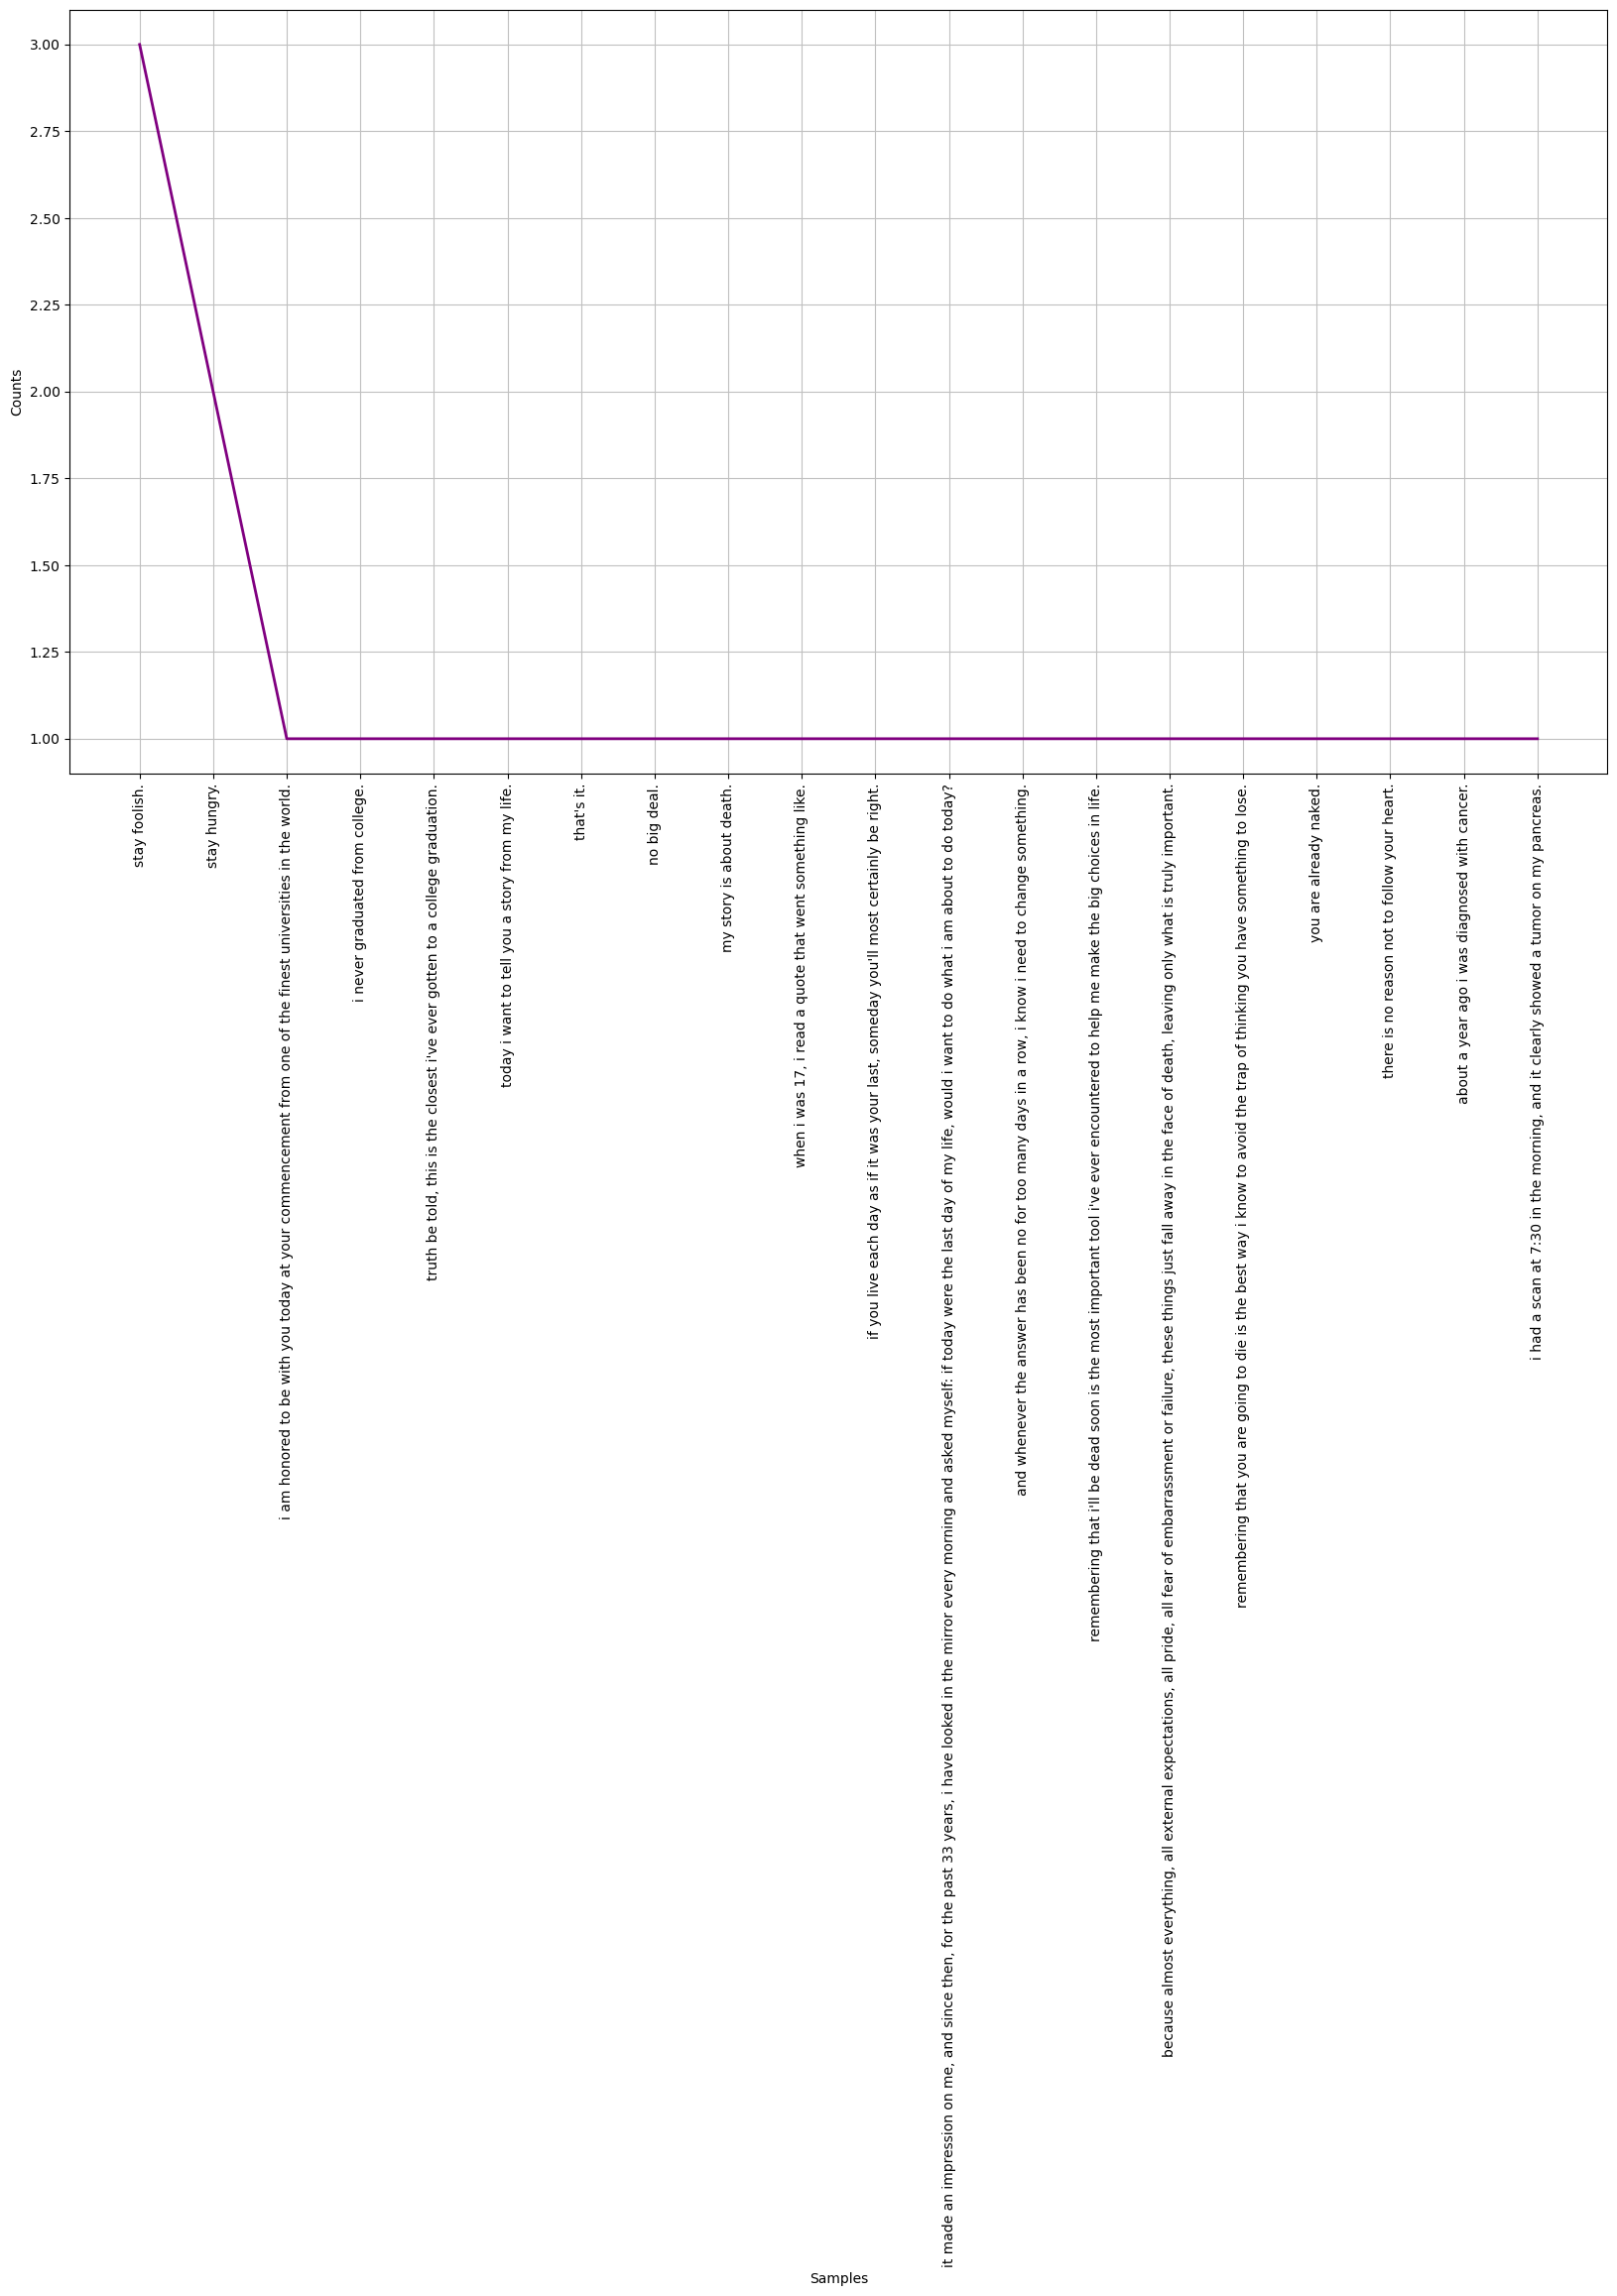

In [69]:
plt.figure(figsize=(20, 10))
fdis.plot(20, cumulative=False, color = "purple")
plt.show()

## Exercici 2

Treu les stopwords i realitza stemming al teu conjunt de dades

In [55]:
#Eliminem els caracters que no siguin alfanumèrics: stopwords

stop_words = set(stopwords.words("english"))
filtered_sentence = [ w.lower() for w in tokenized_word if (w not in stop_words) and (w.isalnum())]

In [60]:
f_dist = FreqDist(filtered_sentence)
f_dist.most_common(30)

[('life', 7),
 ('death', 6),
 ('stay', 6),
 ('want', 5),
 ('today', 4),
 ('one', 4),
 ('know', 4),
 ('everything', 4),
 ('die', 4),
 ('told', 3),
 ('closest', 3),
 ('ever', 3),
 ('tell', 3),
 ('something', 3),
 ('day', 3),
 ('years', 3),
 ('morning', 3),
 ('important', 3),
 ('make', 3),
 ('cancer', 3),
 ('pancreas', 3),
 ('get', 3),
 ('means', 3),
 ('put', 3),
 ('hungry', 3),
 ('foolish', 3),
 ('college', 2),
 ('story', 2),
 ('big', 2),
 ('like', 2)]

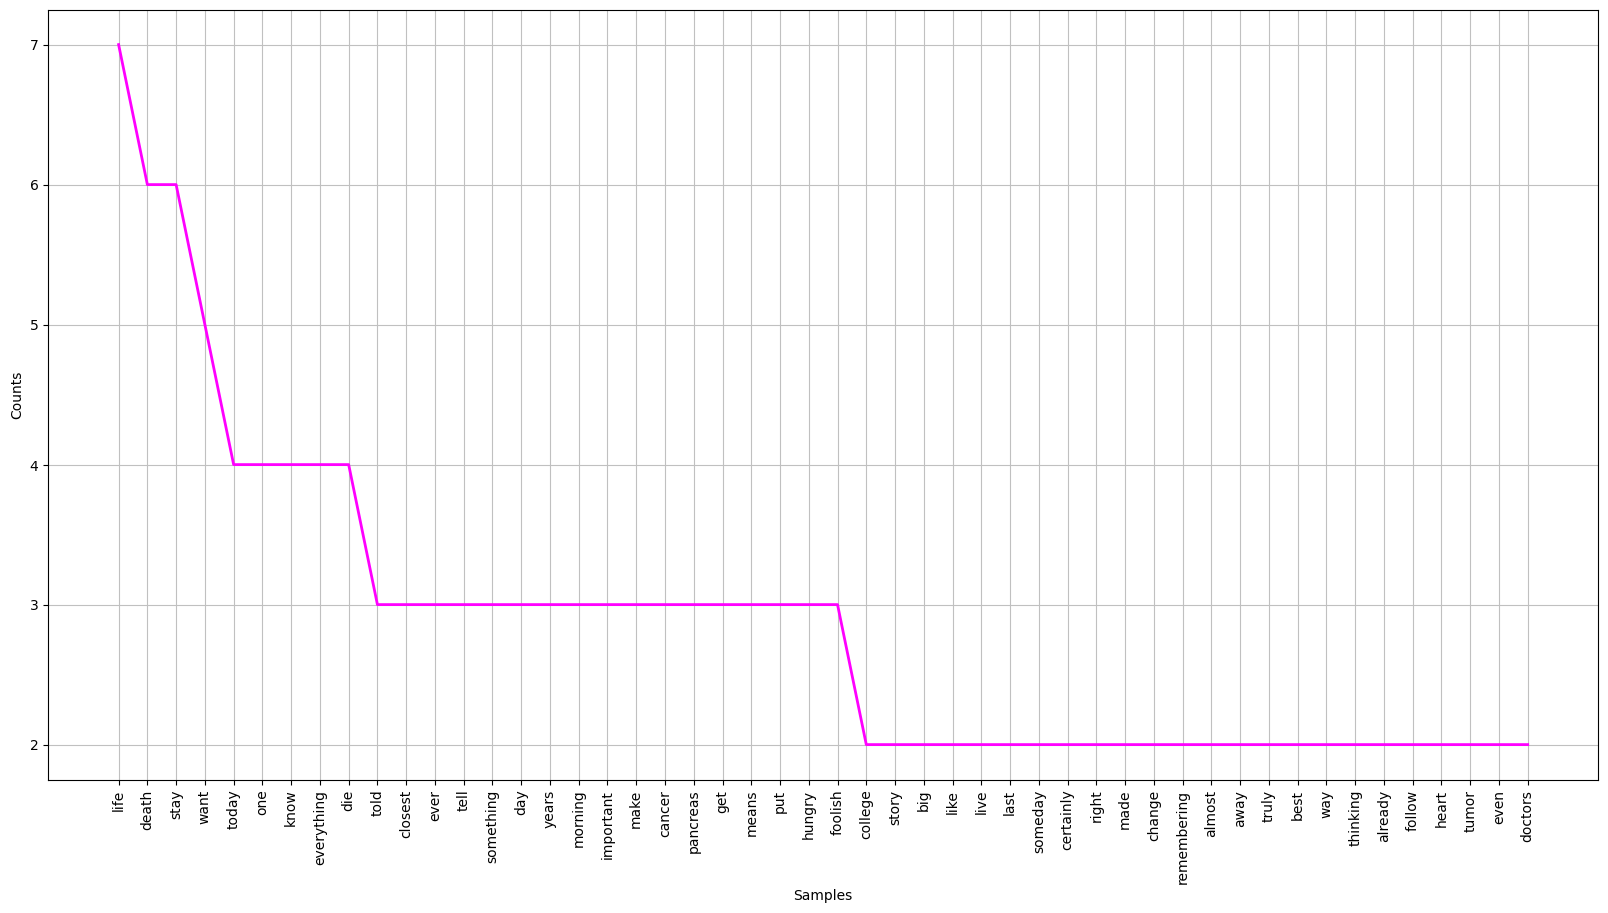

In [61]:
plt.figure(figsize=(20, 10))
f_dist.plot(50,cumulative=False, color = "magenta")
plt.show()

#### PorterStemmer()

L'algoritme de derivació de Porter (o 'Porter stemmer') és un procés per eliminar les terminacions morfològiques i flexionals més comunes de les paraules en anglès. El seu ús principal és com a part d'un procés de normalització de termes que normalment es fa quan es configuren sistemes de recuperació d'informació.

In [74]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [90]:
stemmed_words=[]
for w in filtered_sentence:
    stemmed_words.append(ps.stem(w))

In [91]:
stemmed_words[394:-2]

['stay', 'hungri', 'stay', 'foolish']

In [121]:
f_d = FreqDist(stemmed_words)
f_d.most_common(30)

[('life', 7),
 ('want', 6),
 ('death', 6),
 ('live', 6),
 ('stay', 6),
 ('today', 4),
 ('one', 4),
 ('day', 4),
 ('year', 4),
 ('know', 4),
 ('everyth', 4),
 ('die', 4),
 ('doctor', 4),
 ('graduat', 3),
 ('told', 3),
 ('closest', 3),
 ('ever', 3),
 ('tell', 3),
 ('someth', 3),
 ('like', 3),
 ('morn', 3),
 ('import', 3),
 ('make', 3),
 ('go', 3),
 ('cancer', 3),
 ('pancrea', 3),
 ('even', 3),
 ('get', 3),
 ('mean', 3),
 ('put', 3)]

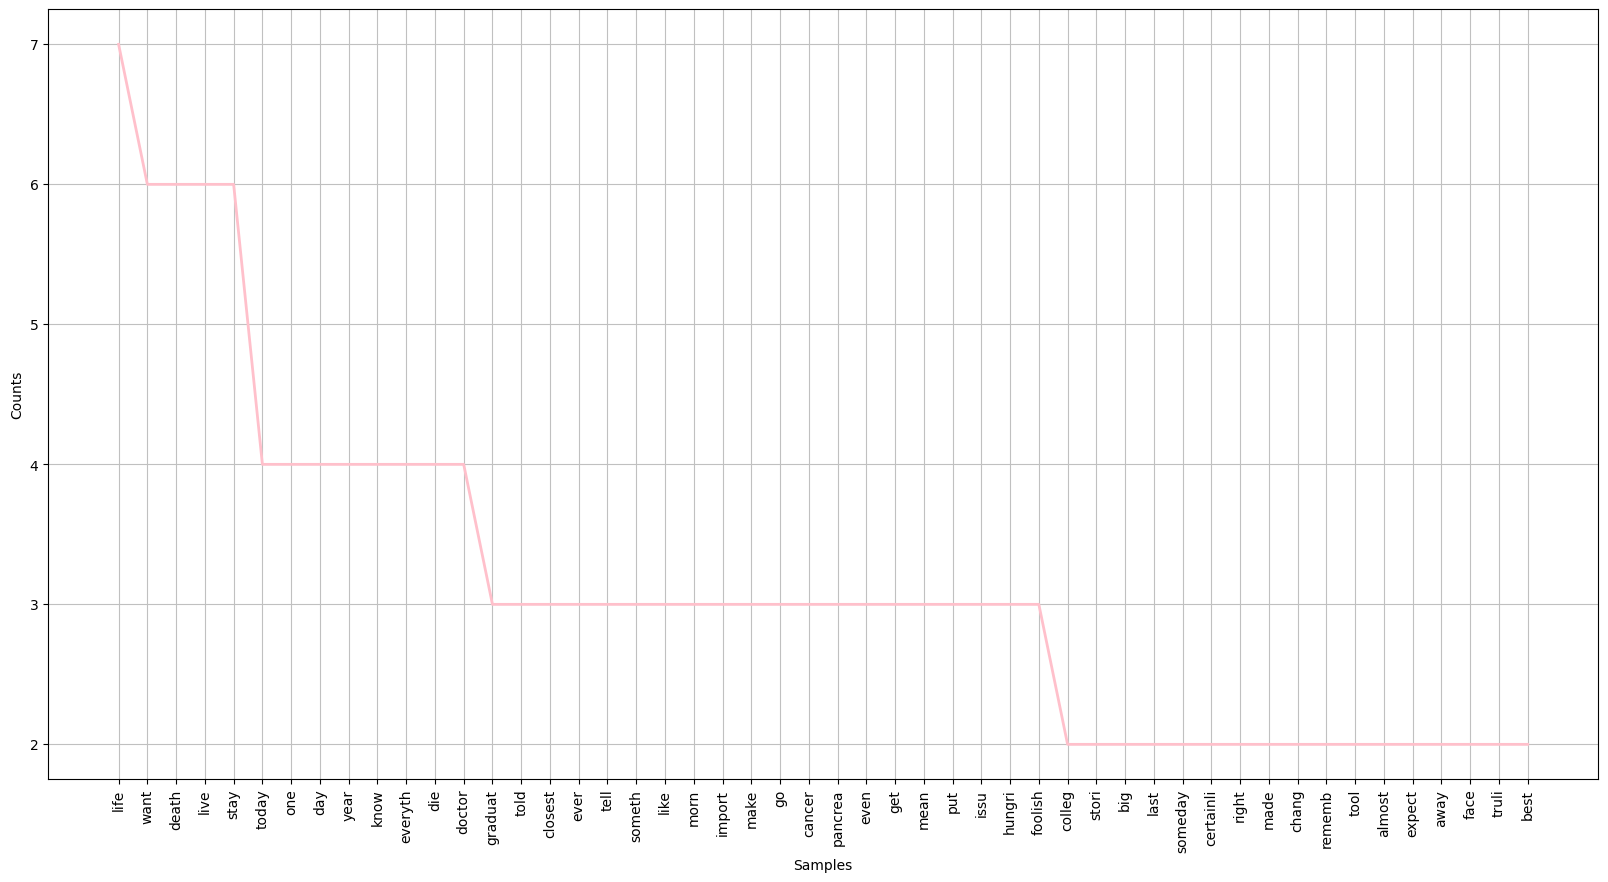

In [122]:
plt.figure(figsize=(20, 10))
f_d.plot(50,cumulative=False, color = "pink")
plt.show()

#### WordNetLemmatizer()

La lematització és el procés de determinació algorítmica del lema d'una paraula en funció del seu significat i context. Es refereix a l'estudi morfològic de les paraules per eliminar les terminacions flexionals.
Ajuda a la recuperació del lema, o forma bàsica, d'una paraula.

Mentres que el mètode stemmer té un sentit més ampli, retalla l'inici o el final de la paraula, es queda amb l'arrel.
D'altra banda, la lematització és un procediment més potent que considera l'anàlisi morfològica de paraules. Retorna el lema, que és la forma flexiva o forma bàsica.

Com a resultat, la lematització ajuda a desenvolupar funcions d'aprenentatge automàtic més efectives.
En lingüística, la lematització es refereix a agrupar les versions flexionades d'una paraula de manera que es puguin analitzar com una sola paraula. NLTK inclou diverses tècniques i funcions de lematització. En contraposició a la derivació, la lematització és millor per determinar el context d'una paraula dins d'un document, fonamental per comprendre un text i aplicar-lo al processament del llenguatge natural i la comprensió del llenguatge natural.

La diferència principal és que la derivació sovint pot produir paraules inexistents, mentre que les paraules són reals en el lematitzador. 

In [101]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

In [116]:
lemma_words=[]

for w in filtered_sentence:
    lemma_words.append(lem.lemmatize(w))

In [117]:
lemma_words[394:-2]

['stay', 'hungry', 'stay', 'foolish']

In [123]:
f_d2 = FreqDist(lemma_words)
f_d2.most_common(30)

[('life', 7),
 ('want', 6),
 ('death', 6),
 ('stay', 6),
 ('today', 4),
 ('one', 4),
 ('day', 4),
 ('year', 4),
 ('know', 4),
 ('everything', 4),
 ('die', 4),
 ('doctor', 4),
 ('told', 3),
 ('closest', 3),
 ('ever', 3),
 ('tell', 3),
 ('something', 3),
 ('morning', 3),
 ('important', 3),
 ('make', 3),
 ('cancer', 3),
 ('pancreas', 3),
 ('get', 3),
 ('mean', 3),
 ('put', 3),
 ('issue', 3),
 ('hungry', 3),
 ('foolish', 3),
 ('college', 2),
 ('story', 2)]

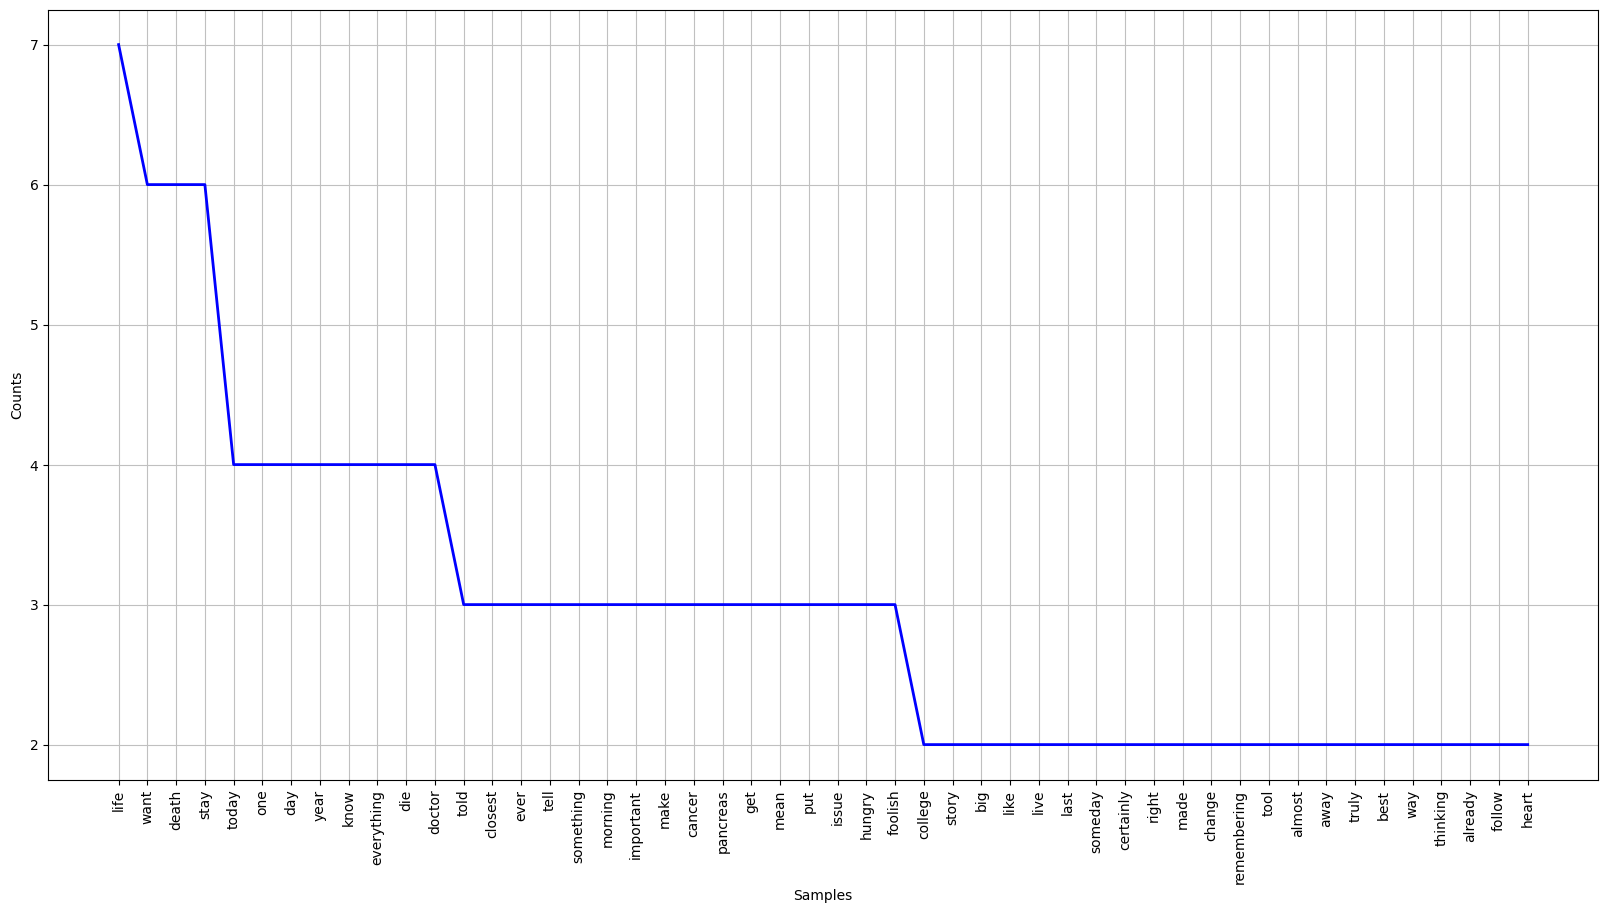

In [124]:
plt.figure(figsize=(20, 10))
f_d2.plot(50,cumulative=False, color = "blue")
plt.show()

### Word Cloud

Nùvol de paraules o *Word Cloud*, és una tècnica de visualització de dades utilitzada per representar dades de text en la qual la mida de cada paraula indica la seva freqüència o importància. Es utilitzada per analitzar dades de websites i xarxes socials.

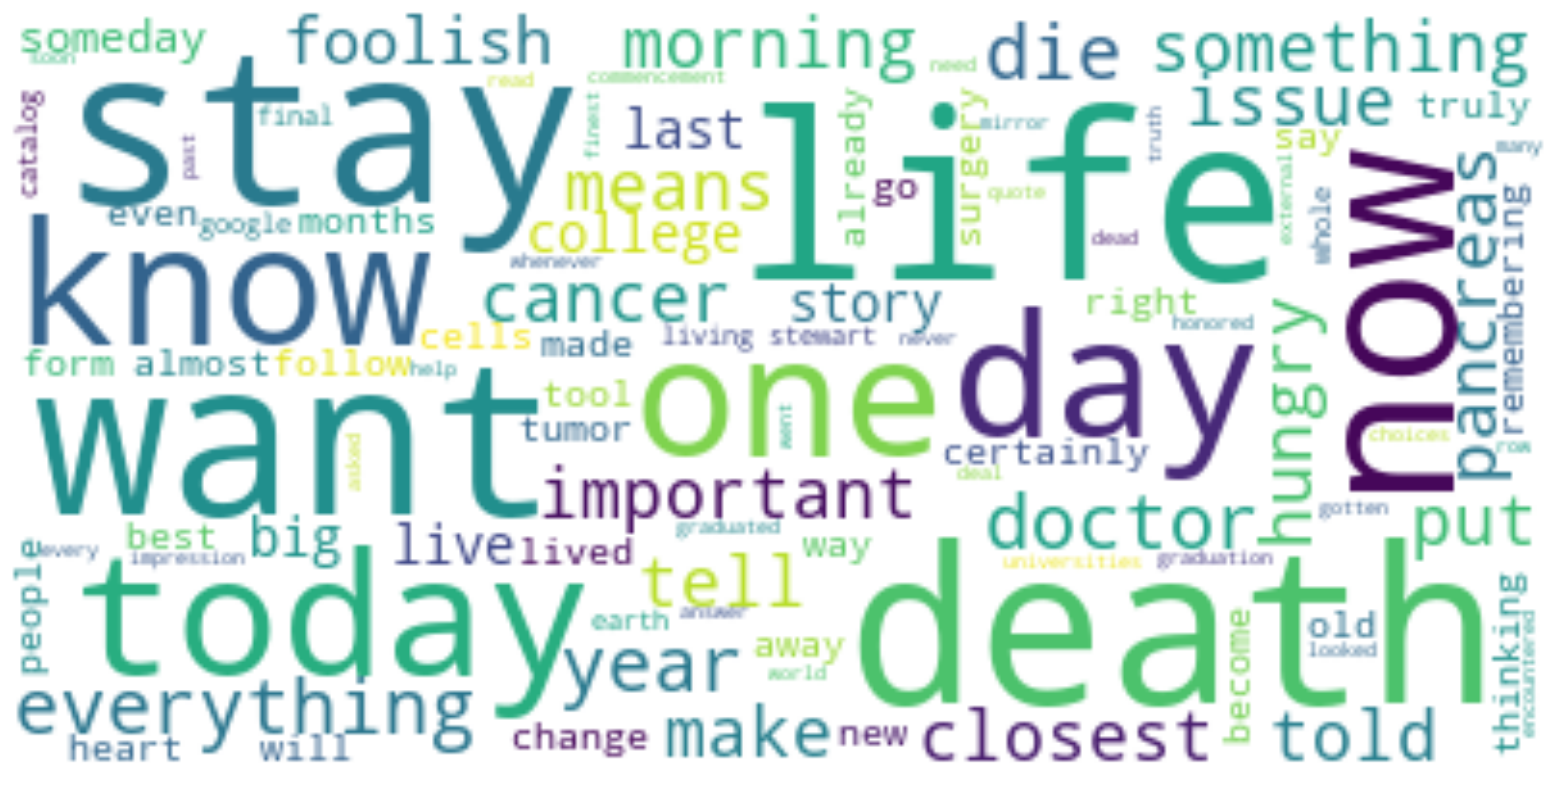

In [120]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(max_font_size=60, max_words=100, background_color="white").generate(speech_txt)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Exercici 3

Realitza sentiment analysis al teu conjunt de dades

In [126]:
pip install -U textblob

     ------------------------------------ 636.8/636.8 kB 852.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [130]:
pip install vaderSentiment


     -------------------------------------- 126.0/126.0 kB 1.5 MB/s eta 0:00:00


#### Mètode Vader 

L'anàlisis de Sentiment és el procés de determinar "computacionalment" si un texte és positiu, negatiu o neutre. També es coneix com a mineria d'opinió, identificant l'opinió o l'actitud d'un interlocutor

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [145]:
def get_sentiment_scores(sentence):

    sentiment = SentimentIntensityAnalyzer()
 
    sentiment_dict = sentiment.polarity_scores(sentence)
     
    print("Diccionari amb els resultats: ", sentiment_dict)
    print("puntuatje: ", sentiment_dict['neg']*100, "% Negatiu")
    print("puntuatje: ", sentiment_dict['neu']*100, "% Neutral")
    print("puntuatje : ", sentiment_dict['pos']*100, "% Positiu")
 
    print("Texte amb tò", end = " ")
 
    if sentiment_dict['compound'] >= 0.05 :
        print("Positiu")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negatiu")
 
    else :
        print("Neutral")
 

In [146]:
get_sentiment_scores(speech_txt)

Diccionari amb els resultats:  {'neg': 0.095, 'neu': 0.774, 'pos': 0.131, 'compound': 0.99}
puntuatje:  9.5 % Negatiu
puntuatje:  77.4 % Neutral
puntuatje :  13.100000000000001 % Positiu
Texte amb tò Positiu


#### text2emotion

In [9]:
import text2emotion as te

te.get_emotion(speech_txt)

{'Happy': 0.13, 'Angry': 0.14, 'Surprise': 0.13, 'Sad': 0.27, 'Fear': 0.33}

In [10]:
emo_te= [] 

for i in tokenized_speech:
    emotion = te.get_emotion(i)
    keymax =max(emotion, key=emotion.get)
    emo_te.append(keymax)

In [11]:
print(emo_te)

['Happy', 'Fear', 'Sad', 'Fear', 'Happy', 'Happy', 'Fear', 'Happy', 'Happy', 'Sad', 'Happy', 'Happy', 'Sad', 'Surprise', 'Happy', 'Sad', 'Happy', 'Happy', 'Happy', 'Happy', 'Surprise', 'Happy', 'Surprise', 'Sad', 'Happy', 'Angry', 'Surprise', 'Happy', 'Fear', 'Fear', 'Angry', 'Fear', 'Fear', 'Fear', 'Fear', 'Sad', 'Angry', 'Sad', 'Surprise', 'Surprise', 'Fear', 'Happy', 'Happy', 'Happy', 'Surprise', 'Sad', 'Sad', 'Happy', 'Sad', 'Angry', 'Fear', 'Angry', 'Angry', 'Fear', 'Angry', 'Angry', 'Happy', 'Happy', 'Angry', 'Angry', 'Happy']


In [12]:
df_sentiment= pd.DataFrame(emo_te,
                  columns=['sentiment'])
print(df_sentiment)

   sentiment
0      Happy
1       Fear
2        Sad
3       Fear
4      Happy
..       ...
56     Happy
57     Happy
58     Angry
59     Angry
60     Happy

[61 rows x 1 columns]


In [13]:
df_sentence = pd.DataFrame(tokenized_speech,
                  columns=['sentence'])
print(df_sentence)

                                             sentence
0   i am honored to be with you today at your comm...
1                     i never graduated from college.
2   truth be told, this is the closest i've ever g...
3      today i want to tell you a story from my life.
4                                          that's it.
..                                                ...
56          and i have always wished that for myself.
57  and now, as you graduate to begin anew, i wish...
58                                       stay hungry.
59                                      stay foolish.
60                           thank you all very much.

[61 rows x 1 columns]


In [15]:
df=pd.concat([df_sentence, df_sentiment], axis=1)
print(df)

                                             sentence sentiment
0   i am honored to be with you today at your comm...     Happy
1                     i never graduated from college.      Fear
2   truth be told, this is the closest i've ever g...       Sad
3      today i want to tell you a story from my life.      Fear
4                                          that's it.     Happy
..                                                ...       ...
56          and i have always wished that for myself.     Happy
57  and now, as you graduate to begin anew, i wish...     Happy
58                                       stay hungry.     Angry
59                                      stay foolish.     Angry
60                           thank you all very much.     Happy

[61 rows x 2 columns]


#### Mètode TextBlob

In [127]:
from textblob import TextBlob

sentA = TextBlob(speech_txt)
print(sentA.sentiment)

Sentiment(polarity=0.13678904068514453, subjectivity=0.4667342253705888)


Subjectivity té un rang de 0 a 1, on 0 es totalment objectiu y 1 es totalment subjetiu. 
Veïem que en el nostre texte la mètrica subjectivity está molt propera a 0.5 per tant, podriem dir que no és totalment objectiu.

Polarity determina el sentiment del text. Els seus valors es troben en [-1,1] on -1 denota un sentiment molt negatiu i 1 denota un sentiment molt positiu.
El valor de la mètrica és positiu, pertant, descriu un sentiment positiu.